# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [10]:
!pip install pyarrow

   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.2 MB 6.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.8/25.2 MB 4.9 MB/s eta 0:00:05
   --- ------------------------------------ 2.1/25.2 MB 4.7 MB/s eta 0:00:05
   ---- ----------------------------------- 3.1/25.2 MB 4.4 MB/s eta 0:00:06
   ------ --------------------------------- 4.2/25.2 MB 4.2 MB/s eta 0:00:05
   ------- -------------------------------- 5.0/25.2 MB 4.2 MB/s eta 0:00:05
   --------- ------------------------------ 5.8/25.2 MB 4.1 MB/s eta 0:00:05
   ---------- ----------------------------- 6.6/25.2 MB 4.1 MB/s eta 0:00:05
   ----------- ---------------------------- 7.3/25.2 MB 4.1 MB/s eta 0:00:05
   ------------ --------------------------- 8.1/25.2 MB 4.0 MB/s eta 0:00:05
   -------------- ------------------------- 8.9/25.2 MB 4.0 MB/s eta 0:00:05
   --------------- ------------------------ 9.7/25.2 MB 4.0 MB/s eta 0:00:04
   ---

In [3]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet('C:/Users/anmol/Documents/Jupiter N/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/anmol/Documents/Jupiter N/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime format
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
        # Create columns for date and hour
        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['pickup_date'].unique():
            day_data = data[data['pickup_date'] == date]
            
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = day_data[day_data['pickup_hour'] == hour]
                 
                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
                 
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
df.to_parquet('C:/Users/anmol/Documents/Jupiter N/Datasets and Dictionary/sampled_data1.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [2]:
# Load the new data file
import pandas as pd
df = pd.read_parquet(r'C:\Users\anmol\Documents\Jupiter N\Datasets and Dictionary\sampled_data.parquet')

In [3]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042850 entries, 0 to 2042849
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [5]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['airport_fee'], inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [7]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(0)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [8]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts



In [9]:
# Find which columns have negative values

(df.select_dtypes(include='number') < 0).any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
pickup_hour              False
Airport_fee               True
dtype: bool

In [10]:
# fix these negative values
columns_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

for col in columns_to_fix:
    df.loc[df[col] < 0, col] = 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [11]:
# Find the proportion of missing values in each column
df.isna().mean().sort_values(ascending=False)


passenger_count          0.034386
store_and_fwd_flag       0.034386
congestion_surcharge     0.034386
RatecodeID               0.034386
VendorID                 0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
PULocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
DOLocationID             0.000000
mta_tax                  0.000000
tip_amount               0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
total_amount             0.000000
pickup_date              0.000000
pickup_hour              0.000000
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [13]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])
df.loc[df['passenger_count'] == 0, 'passenger_count'] = df['passenger_count'].mode()[0]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [14]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [15]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [16]:
# Handle any remaining missing values
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [17]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns
columns_to_check = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
df[columns_to_check].agg(['min', 'max'])

passenger_count  trip_distance  fare_amount  tip_amount  tolls_amount  \
min              1.0           0.00         0.00        0.00           0.0   
max              9.0      126360.46    143163.45      223.08         143.0   

     total_amount  
min          0.00  
max     143167.45

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [18]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [20]:
# Continue with outlier handling
import numpy as np

for col in ['fare_amount', 'tip_amount', 'total_amount']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [22]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 3.6 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 4.2 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 4.1 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.0 MB/s eta 0:00:01
   ---

In [23]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [24]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

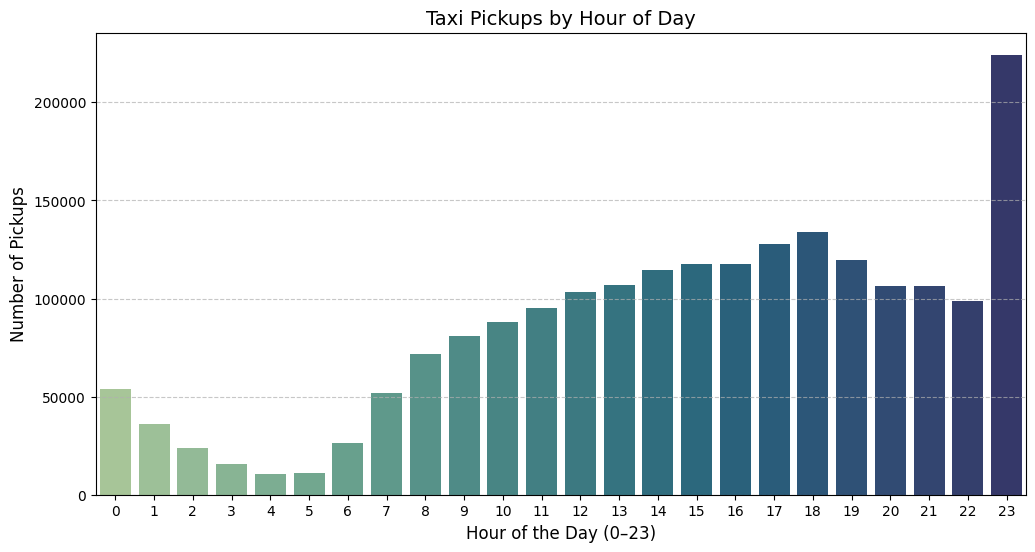

In [26]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', hue='pickup_hour', data=df, palette='crest', legend=False)
plt.title('Taxi Pickups by Hour of Day', fontsize=14)
plt.xlabel('Hour of the Day (0–23)', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

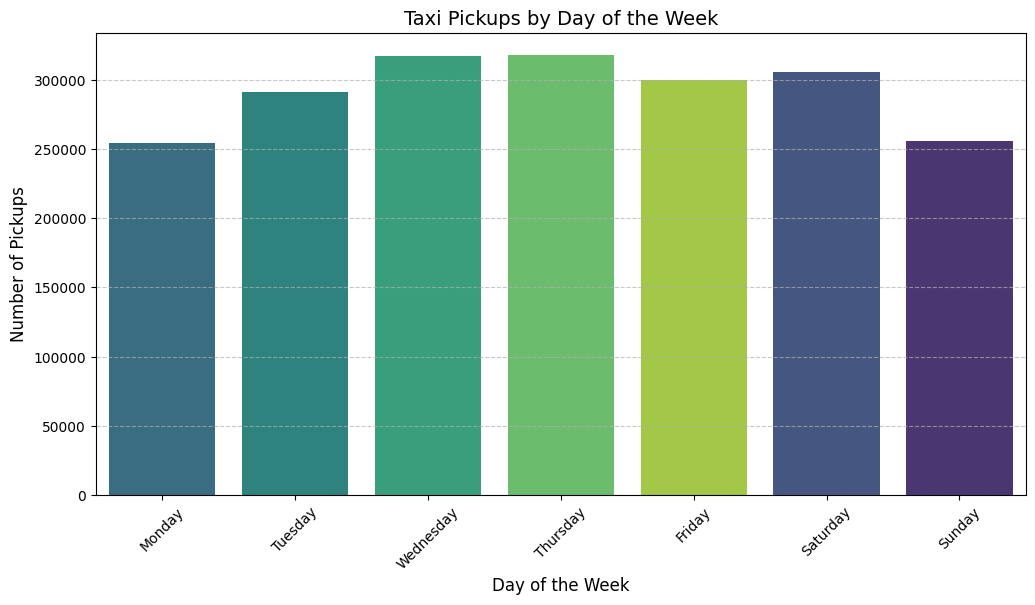

In [27]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['pickup_day'] = df['pickup_date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_day', hue='pickup_day', data=df, order=days_order, palette='viridis', legend=False)
plt.title('Taxi Pickups by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\anmol\AppData\Local\Temp\ipykernel_15164\4198266475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_month', data=df, order=months_order, palette='coolwarm')


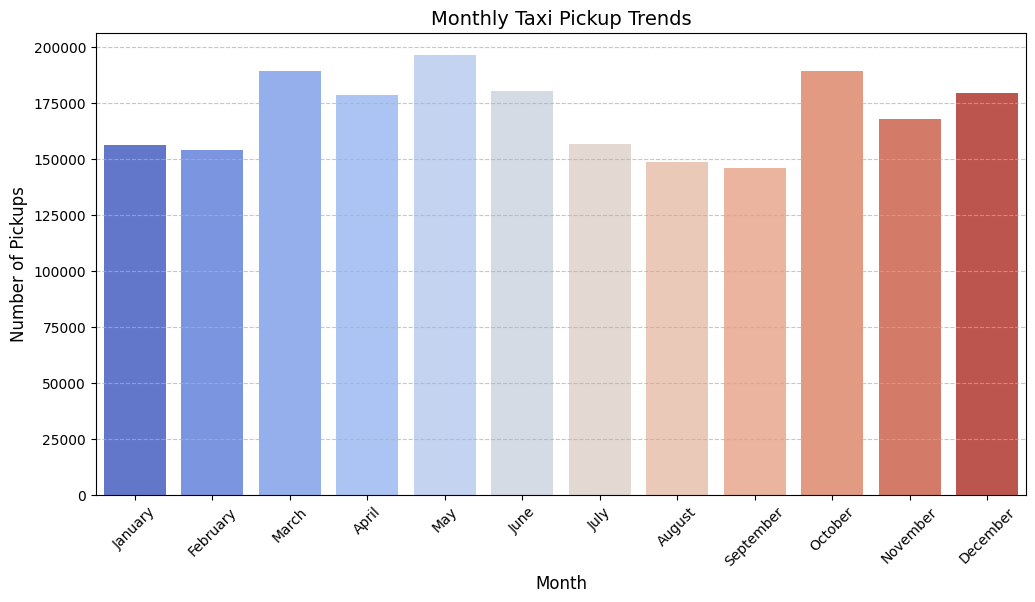

In [28]:
# Show the monthly trends in pickups
df['pickup_month'] = df['pickup_date'].dt.month_name()
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_month', data=df, order=months_order, palette='coolwarm')
plt.title('Monthly Taxi Pickup Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [29]:
# Analyse the above parameters
# Columns to check
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero and negative values
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} - Zero values: {zero_count}, Negative values: {negative_count}")


fare_amount - Zero values: 0, Negative values: 1415320
tip_amount - Zero values: 0, Negative values: 1288657
total_amount - Zero values: 0, Negative values: 1450079
trip_distance - Zero values: 0, Negative values: 1583695


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [30]:
# Create a df with non zero entries for the selected parameters.
df_clean = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

df_clean.shape


(310966, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

C:\Users\anmol\AppData\Local\Temp\ipykernel_15164\3150951922.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_month', y='total_amount', data=monthly_revenue, palette='magma')


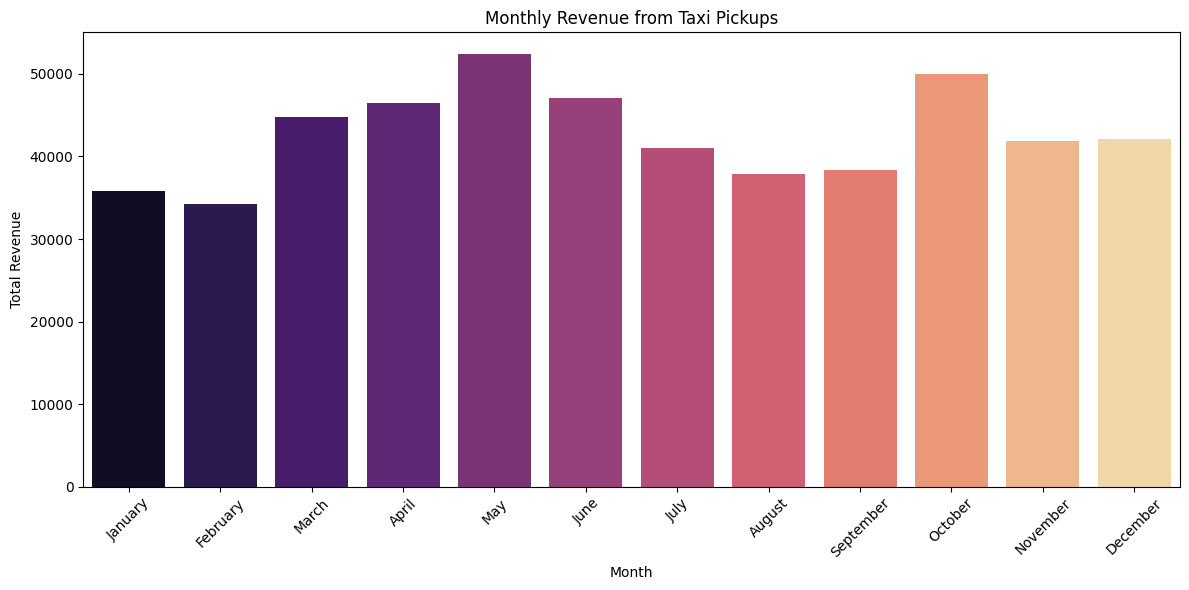

In [32]:
# Group data by month and analyse monthly revenue
df_clean['pickup_date'] = pd.to_datetime(df_clean['pickup_date'])
df_clean['pickup_month'] = df_clean['pickup_date'].dt.strftime('%B')  # e.g., January, February
df_clean['pickup_month_num'] = df_clean['pickup_date'].dt.month

monthly_revenue = df_clean.groupby(['pickup_month_num', 'pickup_month'])['total_amount'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values('pickup_month_num')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_month', y='total_amount', data=monthly_revenue, palette='magma')
plt.title('Monthly Revenue from Taxi Pickups')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [33]:
# Calculate proportion of each quarter
# Ensure pickup_date is datetime
df_clean['pickup_date'] = pd.to_datetime(df_clean['pickup_date'])

# Extract quarter info
df_clean['pickup_quarter'] = df_clean['pickup_date'].dt.quarter

# Group by quarter and sum the total_amount
quarterly_revenue = df_clean.groupby('pickup_quarter')['total_amount'].sum().reset_index()

# Calculate the proportion
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

# Round for neatness
quarterly_revenue['proportion'] = quarterly_revenue['proportion'].round(2)

# Display
print(quarterly_revenue)


   pickup_quarter   total_amount  proportion
0               1  114903.229139       22.44
1               2  145951.579051       28.50
2               3  117255.772845       22.90
3               4  133916.052954       26.15


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

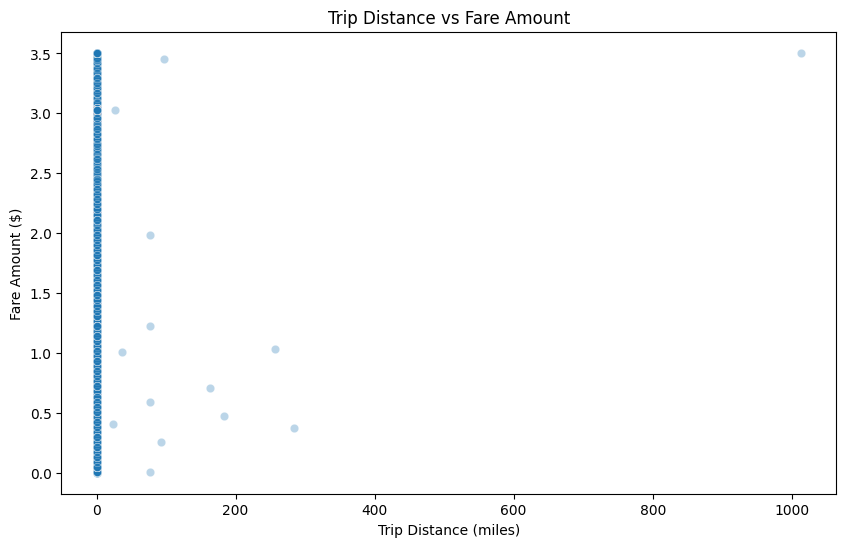

Correlation between trip distance and fare amount: 0.022631474857966932


In [34]:
# Show how trip fare is affected by distance
# Show how trip fare is affected by distance
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out trips with zero trip_distance
df_filtered = df_clean[df_clean['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Correlation
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print("Correlation between trip distance and fare amount:", correlation)



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

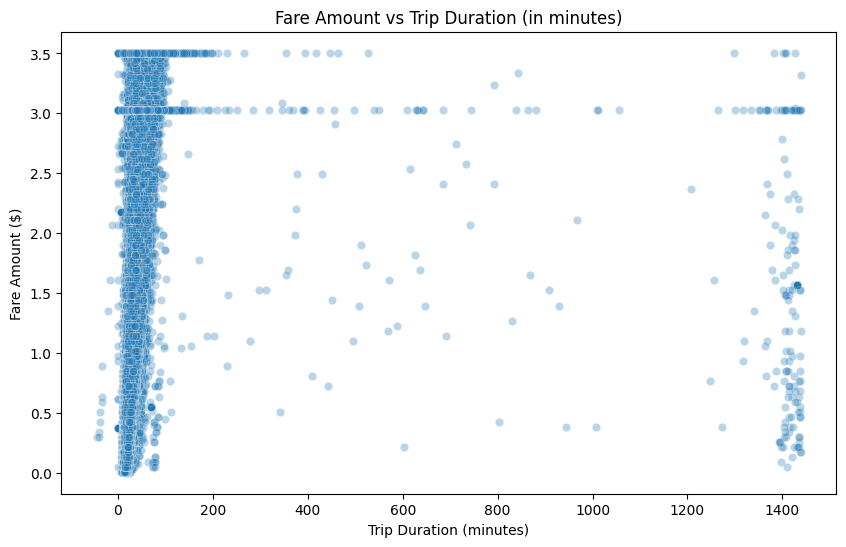

Correlation between fare and trip duration: 0.3067774043504045


In [35]:
# Show relationship between fare and trip duration
df_clean['trip_duration'] = (pd.to_datetime(df_clean['tpep_dropoff_datetime']) - pd.to_datetime(df_clean['tpep_pickup_datetime'])).dt.total_seconds() / 60
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()
print("Correlation between fare and trip duration:", df_clean['fare_amount'].corr(df_clean['trip_duration']))

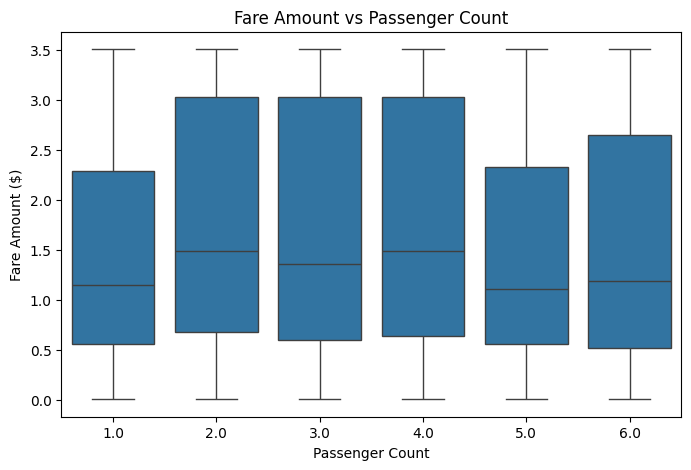

Correlation between fare and passenger count: 0.06215202396715741


In [36]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8,5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_clean)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

# Correlation
print("Correlation between fare and passenger count:", df_clean['fare_amount'].corr(df_clean['passenger_count']))


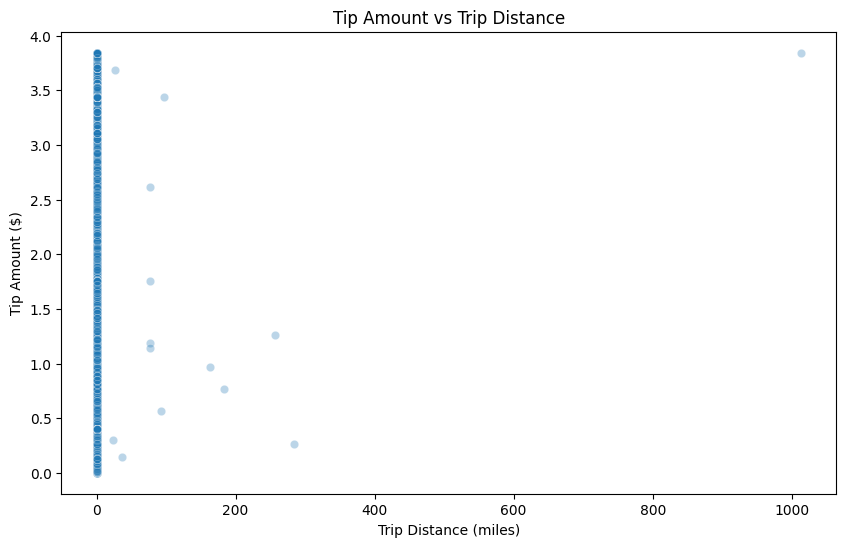

Correlation between tip and trip distance: 0.01763979645574623


In [37]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_clean, alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

# Correlation
print("Correlation between tip and trip distance:", df_clean['tip_amount'].corr(df_clean['trip_distance']))

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

C:\Users\anmol\AppData\Local\Temp\ipykernel_15164\2637633585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df_clean, palette='Set2')


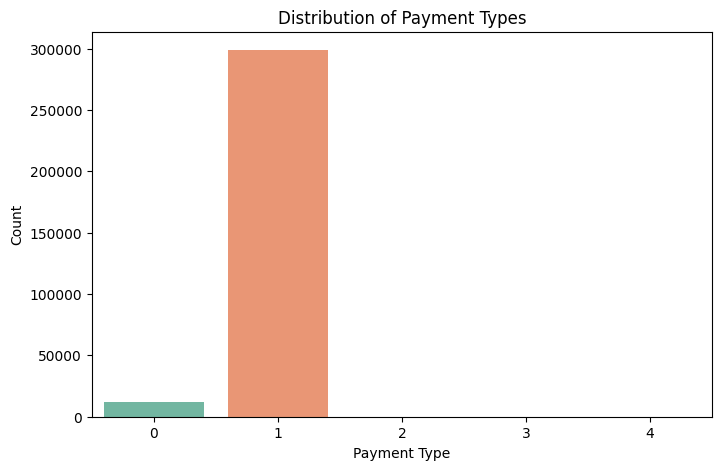

In [38]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(8,5))
sns.countplot(x='payment_type', data=df_clean, palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [40]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\anmol\Documents\Jupiter N\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

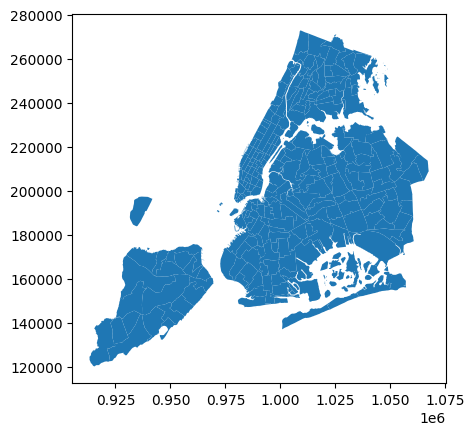

In [41]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [42]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df_clean, zones, how='left', left_on='PULocationID', right_on='LocationID')
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
1         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
2         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
3         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
4         2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.123132         1.0                  N            66           107   
1       0.025772         1.0                  N           246            37   
2       0.030103         1.0                  N           132            95   
3       0.003878         1.0                  N           142           148   
4       0.055205         1.0                  N           151           106   

   payment_type  ...  pickup_month_num  pickup_quarter  trip_duration  \
0             0  ...                 1               1      18.000000   
1             1  ...                 1               1      33.616667   
2             1  ...                 1               1      17.133333   
3             1  ...                 1               1      25.000000   
4             0  ...                 1               1      33.000000   

   OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
0      66.0    0.054633    0.000108         DUMBO/Vinegar Hill        66.0   
1     246.0    0.069467    0.000281  West Chelsea/Hudson Yards       246.0   
2     132.0    0.245479    0.002038                JFK Airport       132.0   
3     142.0    0.038176    0.000076        Lincoln Square East       142.0   
4     151.0    0.054890    0.000129           Manhattan Valley       151.0   

     borough                                           geometry  
0   Brooklyn  POLYGON ((990055.507 196472.349, 990004.46 196...  
1  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...  
2     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  Manhattan  POLYGON ((994298.215 228195.015, 994169.55 227...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [43]:
# Group data by location and calculate the number of trips
trips_by_location = merged_df.groupby('zone').size().reset_index(name='num_trips')
trips_by_location = trips_by_location.sort_values(by='num_trips', ascending=False)
trips_by_location.head()


zone  num_trips
94                 JFK Airport      67780
104          LaGuardia Airport      54047
183  Times Sq/Theatre District       8893
125             Midtown Center       8001
52               East Elmhurst       6951

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [44]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_by_location, on='zone', how='left')
zones['num_trips'] = zones['num_trips'].fillna(0)  # Replace NaNs with 0 for zones with no trips
zones.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  num_trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...       34.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...        2.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...        0.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...      392.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...        0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

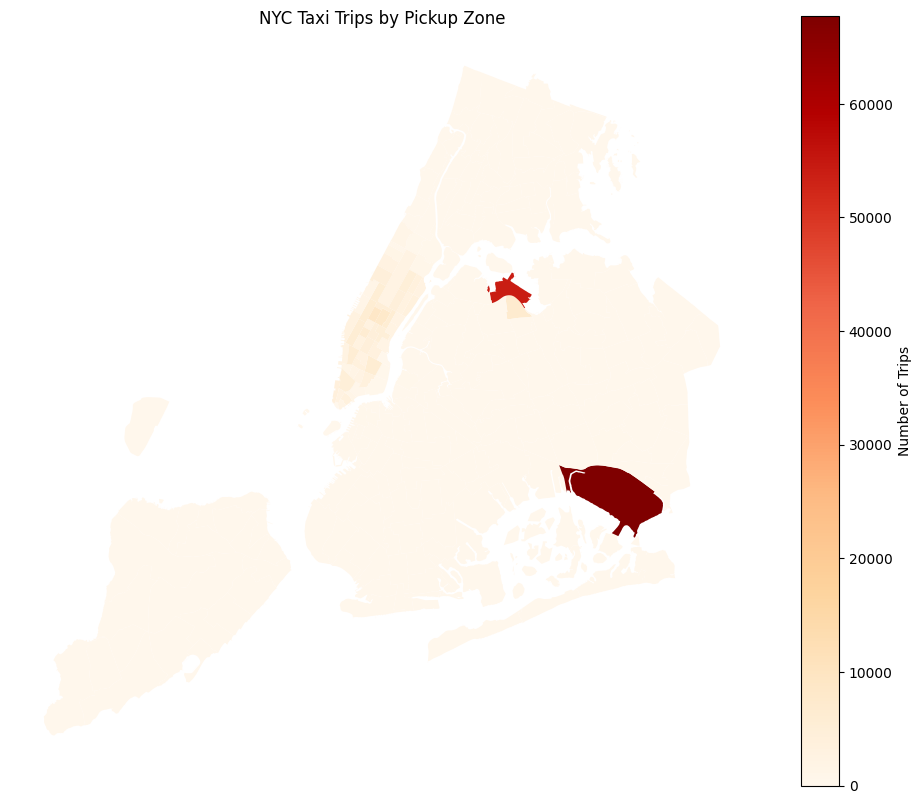

In [45]:
import matplotlib.pyplot as plt
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the map and display it
zones.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)

plt.title('NYC Taxi Trips by Pickup Zone')
plt.axis('off')
plt.show()


In [46]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='num_trips', ascending=False)
zones_sorted[['zone', 'borough', 'num_trips']].head(10)


zone    borough  num_trips
131                   JFK Airport     Queens    67780.0
137             LaGuardia Airport     Queens    54047.0
229     Times Sq/Theatre District  Manhattan     8893.0
160                Midtown Center  Manhattan     8001.0
69                  East Elmhurst     Queens     6951.0
185  Penn Station/Madison Sq West  Manhattan     6214.0
161                  Midtown East  Manhattan     6015.0
78                   East Village  Manhattan     5922.0
47                   Clinton East  Manhattan     5897.0
248                  West Village  Manhattan     5736.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [47]:
# Find routes which have the slowest speeds at different times of the day

df_clean['trip_duration_hours'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_clean = df_clean[df_clean['trip_duration_hours'] > 0]
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
grouped = df_clean.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_hours': 'mean'
}).reset_index()
grouped['avg_speed_mph'] = grouped['trip_distance'] / grouped['trip_duration_hours']
slow_routes = grouped.sort_values(by='avg_speed_mph').head(10)
slow_routes


PULocationID  DOLocationID  pickup_hour  trip_distance  \
49330           232           163           14       0.000029   
15380           100           142           14       0.000029   
3295             43           100           10       0.000029   
32949           148            50           13       0.000029   
46696           230             4           14       0.000029   
54942           239           186            9       0.000029   
43309           186           237           20       0.000029   
1828             24           140           13       0.000029   
17130           113            43           12       0.000029   
15251           100            90            9       0.000029   

       trip_duration_hours  avg_speed_mph  
49330             0.713333       0.000040  
15380             0.674167       0.000043  
3295              0.649167       0.000044  
32949             0.588333       0.000049  
46696             0.585833       0.000049  
54942             0.547222       0.000053  
43309             0.524444       0.000055  
1828              0.523889       0.000055  
17130             0.502500       0.000057  
15251             0.497222       0.000058

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

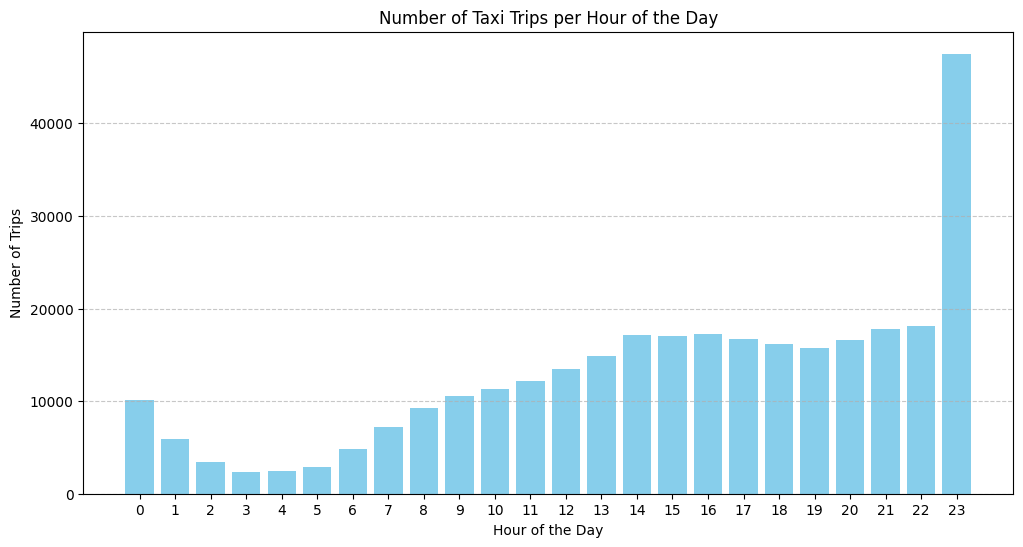

pickup_hour       23
num_trips      47514
Name: 23, dtype: int64

In [48]:
# Visualise the number of trips per hour and find the busiest hour
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
trips_per_hour = df_clean.groupby('pickup_hour').size().reset_index(name='num_trips')

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(trips_per_hour['pickup_hour'], trips_per_hour['num_trips'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Taxi Trips per Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

trips_per_hour.loc[trips_per_hour['num_trips'].idxmax()]



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [49]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01
trips_per_hour['actual_trips'] = trips_per_hour['num_trips'] / sample_fraction
top5_busiest_hours = trips_per_hour.sort_values(by='actual_trips', ascending=False).head(5)
top5_busiest_hours



pickup_hour  num_trips  actual_trips
23           23      47514     4751400.0
22           22      18072     1807200.0
21           21      17819     1781900.0
16           16      17211     1721100.0
14           14      17182     1718200.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [51]:
%whos

Variable             Type              Data/Info
------------------------------------------------
StandardScaler       type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
ax                   Axes              Axes(0.125,0.126582;0.62x0.736835)
col                  str               trip_distance
cols_to_check        list              n=4
columns_to_check     list              n=6
columns_to_fix       list              n=6
columns_to_scale     list              n=4
correlation          float64           0.022631474857966932
days_order           list              n=7
df                   DataFrame                  VendorID tpep_pi<...>042829 rows x 23 columns]
df_clean             DataFrame                  VendorID tpep_pi<...>310953 rows x 27 columns]
df_filtered          DataFrame                  VendorID tpep_pi<...>310966 rows x 25 columns]
fig                  Figure            Figure(1200x1000)
gpd                  module            <module 'geopandas' from

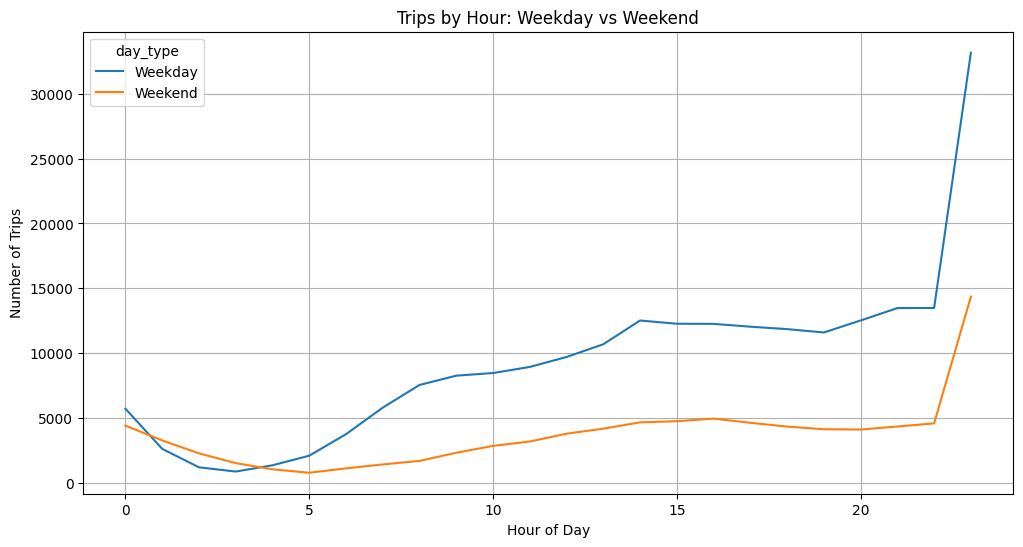

In [52]:
# Compare traffic trends for the week days and weekends
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.dayofweek
df_clean['day_type'] = df_clean['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

df_clean.groupby(['day_type', df_clean['pickup_datetime'].dt.hour]).size().unstack(0).plot(kind='line', figsize=(12, 6))
plt.title('Trips by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

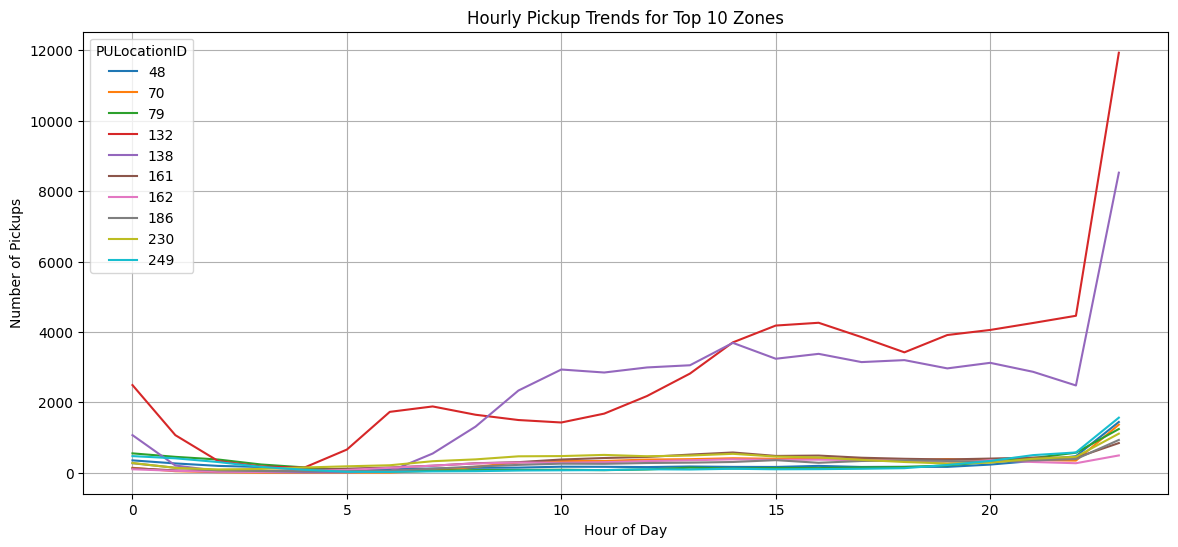

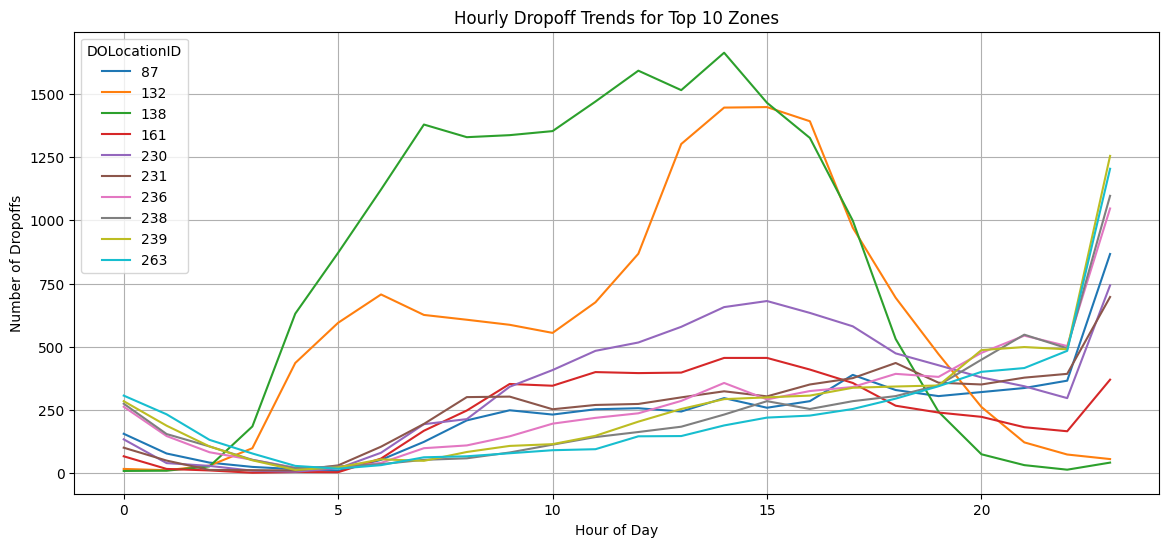

In [53]:
# Find top 10 pickup and dropoff zones
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['pickup_hour'] = df_clean['pickup_datetime'].dt.hour

# Top 10 pickup zones
top10_pickup = df_clean['PULocationID'].value_counts().head(10).index
pickup_trends = df_clean[df_clean['PULocationID'].isin(top10_pickup)]
pickup_trends.groupby(['pickup_hour', 'PULocationID']).size().unstack().plot(figsize=(14, 6))
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.legend(title='PULocationID')
plt.show()

# Top 10 dropoff zones
top10_dropoff = df_clean['DOLocationID'].value_counts().head(10).index
dropoff_trends = df_clean[df_clean['DOLocationID'].isin(top10_dropoff)]
dropoff_trends.groupby(['pickup_hour', 'DOLocationID']).size().unstack().plot(figsize=(14, 6))
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.grid(True)
plt.legend(title='DOLocationID')
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [54]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_clean['PULocationID'].value_counts()
dropoff_counts = df_clean['DOLocationID'].value_counts()

pickup_dropoff_df = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
}).fillna(0)


pickup_dropoff_df['pickup_dropoff_ratio'] = pickup_dropoff_df['pickups'] / pickup_dropoff_df['dropoffs'].replace(0, 1)

# Top 10 zones with highest ratio
top10_ratio = pickup_dropoff_df.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 zones with lowest ratio
bottom10_ratio = pickup_dropoff_df.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratio Zones:\n", top10_ratio)
print("\nBottom 10 Pickup/Dropoff Ratio Zones:\n", bottom10_ratio)



Top 10 Pickup/Dropoff Ratio Zones:
      pickups  dropoffs  pickup_dropoff_ratio
70    6951.0     282.0             24.648936
132  67780.0   14053.0              4.823169
138  54047.0   19221.0              2.811872
186   6214.0    2454.0              2.532192
249   5734.0    2440.0              2.350000
199      2.0       0.0              2.000000
207      6.0       3.0              2.000000
2        2.0       0.0              2.000000
114   3493.0    1783.0              1.959058
215    130.0      77.0              1.688312

Bottom 10 Pickup/Dropoff Ratio Zones:
      pickups  dropoffs  pickup_dropoff_ratio
3        0.0      51.0                   0.0
23       0.0      31.0                   0.0
30       0.0       7.0                   0.0
27       0.0      21.0                   0.0
32       0.0      32.0                   0.0
240      0.0      20.0                   0.0
245      0.0      19.0                   0.0
44       0.0       3.0                   0.0
64       0.0      96.0  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [55]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Convert pickup datetime if not already converted
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])

# Extract hour
df_clean['pickup_hour'] = df_clean['pickup_datetime'].dt.hour

# Filter for night hours (11 PM to 5 AM → 23, 0, 1, 2, 3, 4, 5)
night_hours = [23, 0, 1, 2, 3, 4, 5]
night_data = df_clean[df_clean['pickup_hour'].isin(night_hours)]

# Top 10 pickup zones during night hours
top10_night_pickups = night_data['PULocationID'].value_counts().head(10)

# Top 10 dropoff zones during night hours
top10_night_dropoffs = night_data['DOLocationID'].value_counts().head(10)


print("Top 10 Night Pickup Zones:\n", top10_night_pickups)
print("\nTop 10 Night Dropoff Zones:\n", top10_night_dropoffs)


Top 10 Night Pickup Zones:
 PULocationID
132    16806
138     9901
79      3056
249     3032
48      2637
148     2248
230     2062
114     1924
142     1858
68      1588
Name: count, dtype: int64

Top 10 Night Dropoff Zones:
 DOLocationID
263    2001
239    1921
138    1776
238    1733
236    1637
181    1598
265    1476
243    1260
132    1245
141    1221
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [56]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile for each trip
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']

# Calculate fare per mile per passenger (divide fare per mile by passenger_count)
df_clean['fare_per_mile_per_passenger'] = df_clean['fare_per_mile'] / df_clean['passenger_count']

# Group by passenger_count and calculate the average fare per mile per passenger
fare_analysis = df_clean.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print(fare_analysis)



   passenger_count  fare_per_mile_per_passenger
0              1.0                    79.851446
1              2.0                    37.826288
2              3.0                    31.990152
3              4.0                    20.691330
4              5.0                    18.069088
5              6.0                    12.274335


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [57]:
# Compare the average fare per mile for different days and for different times of the day
# Compare the average fare per mile for different days and different times of the day

# Convert to datetime if not already done
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])

# Extract day of week and hour
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.day_name()
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour

# Calculate fare per mile
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']

# Remove infinite or NaN values
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Group by day of week
avg_fare_per_day = df_clean.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Group by hour of day
avg_fare_per_hour = df_clean.groupby('hour')['fare_per_mile'].mean().reset_index()

print(avg_fare_per_day)
print(avg_fare_per_hour)



  day_of_week  fare_per_mile
0      Friday      89.358824
1      Monday      59.073541
2    Saturday      93.093550
3      Sunday      58.877209
4    Thursday      88.038098
5     Tuesday      82.235751
6   Wednesday      88.916214
    hour  fare_per_mile
0      0      56.783820
1      1      43.577566
2      2      48.608613
3      3      51.065375
4      4      33.599608
5      5      28.597467
6      6      33.241609
7      7      57.794982
8      8      76.602457
9      9      83.786933
10    10      84.791824
11    11      98.433965
12    12      93.424414
13    13      94.934311
14    14      92.151467
15    15      98.669339
16    16     115.270092
17    17     113.023887
18    18     101.435981
19    19      82.685160
20    20      77.787771
21    21      69.002509
22    22      70.448555
23    23      56.520005


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [58]:
# Compare fare per mile for different vendors

df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']

# Remove infinite or NaN values
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Group by VendorID and calculate average fare per mile
avg_fare_by_vendor = df_clean.groupby('VendorID')['fare_per_mile'].mean().reset_index()

print(avg_fare_by_vendor)

   VendorID  fare_per_mile
0         1      94.053458
1         2      75.805089


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [59]:
# Defining distance tiers

# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

# Apply tier to dataframe
df_clean['distance_tier'] = df_clean['trip_distance'].apply(distance_tier)

# Calculate fare per mile
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Group by VendorID and distance tier
tiered_fare_comparison = df_clean.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print(tiered_fare_comparison)


   VendorID distance_tier  fare_per_mile
0         1     0-2 miles      94.053458
1         2     0-2 miles      75.809486
2         2      5+ miles       0.018742


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [60]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
df_clean['tip_percentage'] = (df_clean['tip_amount'] / df_clean['fare_amount']) * 100
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['tip_percentage'])

# Create distance bins
df_clean['distance_bin'] = pd.cut(df_clean['trip_distance'], bins=[0, 2, 5, 10, 20, np.inf],
                                   labels=['0-2', '2-5', '5-10', '10-20', '20+'])

# Extract pickup hour
df_clean['pickup_hour'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.hour

# Group by distance bin
tip_by_distance = df_clean.groupby('distance_bin')['tip_percentage'].mean().reset_index()

# Group by passenger count
tip_by_passenger = df_clean.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group by pickup hour
tip_by_hour = df_clean.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Display the results
print("Tip Percentage by Distance Bin:\n", tip_by_distance)
print("\nTip Percentage by Passenger Count:\n", tip_by_passenger)
print("\nTip Percentage by Pickup Hour:\n", tip_by_hour)



Tip Percentage by Distance Bin:
   distance_bin  tip_percentage
0          0-2      213.462680
1          2-5             NaN
2         5-10             NaN
3        10-20             NaN
4          20+     1506.079354

Tip Percentage by Passenger Count:
    passenger_count  tip_percentage
0              1.0      217.664513
1              2.0      195.962134
2              3.0      189.878488
3              4.0      247.473304
4              5.0      214.687778
5              6.0      220.315384

Tip Percentage by Pickup Hour:
     pickup_hour  tip_percentage
0             0      301.550007
1             1      427.477155
2             2      476.843828
3             3      485.018560
4             4      259.864921
5             5      191.882235
6             6      193.170798
7             7      171.113008
8             8      167.659975
9             9      176.545639
10           10      167.748859
11           11      169.917480
12           12      163.425557
13           13   

C:\Users\anmol\AppData\Local\Temp\ipykernel_15164\2806109733.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_clean.groupby('distance_bin')['tip_percentage'].mean().reset_index()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [61]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Define tip categories
low_tip_trips = df_clean[df_clean['tip_percentage'] < 10]
high_tip_trips = df_clean[df_clean['tip_percentage'] > 25]

# Compare average stats
comparison = pd.DataFrame({
    'Low Tip (<10%)': low_tip_trips[['fare_amount', 'trip_distance', 'passenger_count', 'tip_percentage']].mean(),
    'High Tip (>25%)': high_tip_trips[['fare_amount', 'trip_distance', 'passenger_count', 'tip_percentage']].mean()
})

print(comparison)



                 Low Tip (<10%)  High Tip (>25%)
fare_amount            1.846914         1.478513
trip_distance          0.063249         0.059537
passenger_count        1.371535         1.397876
tip_percentage         5.817215       222.105265


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

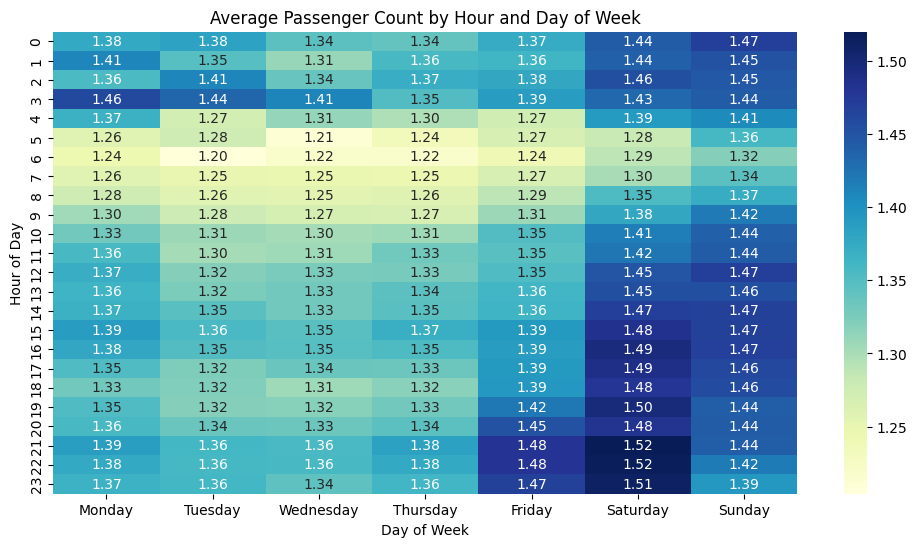

In [62]:
# See how passenger count varies across hours and days
# Convert pickup datetime and extract hour and weekday
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# Group by hour and day to get average passenger count
passenger_trends = df.groupby(['pickup_hour', 'day_of_week'])['passenger_count'].mean().reset_index()

# Pivot the table for heatmap
passenger_pivot = passenger_trends.pivot(index='pickup_hour', columns='day_of_week', values='passenger_count')

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_pivot = passenger_pivot[days_order]

# Visualize with heatmap
plt.figure(figsize=(12,6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

C:\Users\anmol\AppData\Local\Temp\ipykernel_15164\815112957.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_passenger_by_zone_sorted, x='passenger_count', y='zone', palette='viridis')


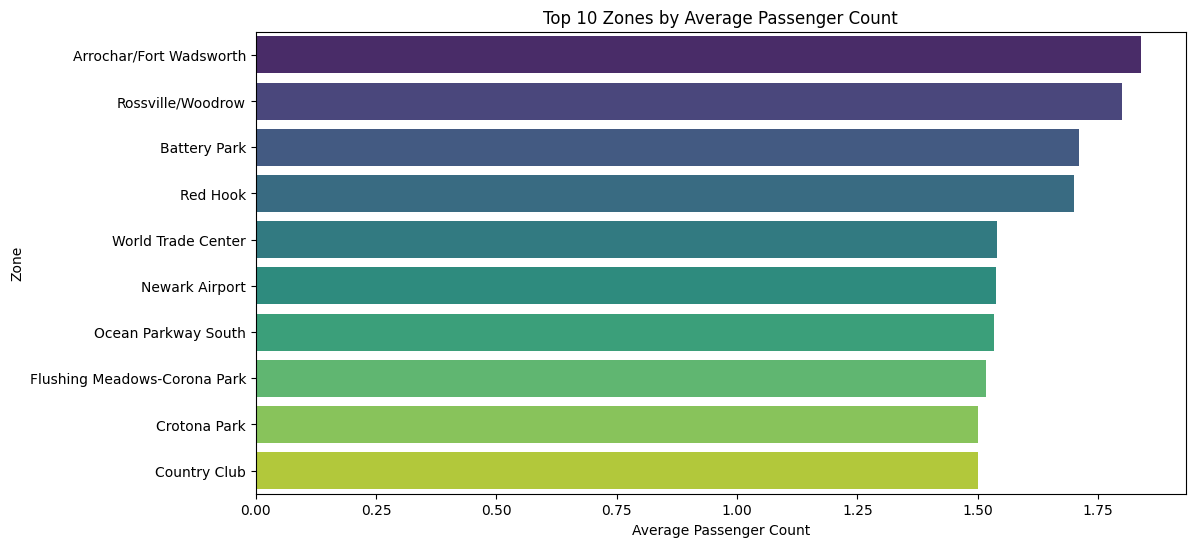

In [63]:
# How does passenger count vary across zones
# Group by pickup zone and calculate average passenger count
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone names if available
avg_passenger_by_zone = avg_passenger_by_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID')

# Sort by average passenger count
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(by='passenger_count', ascending=False).head(10)

# Plot top 10 zones by average passenger count
plt.figure(figsize=(12,6))
sns.barplot(data=avg_passenger_by_zone_sorted, x='passenger_count', y='zone', palette='viridis')
plt.title('Top 10 Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.show()


In [64]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by pickup location and calculate average passenger count
avg_passenger_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge with zones GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no data)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

# View the GeoDataFrame with the new column
zones_with_trips[['zone', 'avg_passenger_count']].head()


zone  avg_passenger_count
0           Newark Airport             1.537500
1              Jamaica Bay             1.000000
2  Allerton/Pelham Gardens             1.022727
3            Alphabet City             1.358675
4            Arden Heights             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [67]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

for col in surcharge_cols:
    applied_count = (df[col] > 0).sum()
    total_count = df[col].notna().sum()
    percentage = (applied_count / total_count) * 100
    print(f"{col}: Applied {applied_count} times ({percentage:.2f}%)")


extra: Applied 1274215 times (62.38%)
mta_tax: Applied 2023694 times (99.06%)
improvement_surcharge: Applied 2041827 times (99.95%)
congestion_surcharge: Applied 1816367 times (88.91%)
Airport_fee: Applied 167104 times (8.18%)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
"""To make routing and dispatching better, we should focus more on the areas that usually have a lot of demand, like Arrochar/Fort Wadsworth or Battery Park. These zones see more passengers, so having more vehicles ready there can reduce wait times and improve customer satisfaction.
Also, we saw that demand changes depending on the time—especially during morning and evening hours. So, if we dispatch more drivers during those peak hours, we can make better use of our resources and avoid delays.
Another thing is the airport areas, like Newark Airport. Since these places have consistently higher passenger counts, we should try to keep a few cars always available around there to meet the demand quickly.
We also noticed some extra charges like congestion or improvement surcharges are applied often in some areas. To save both time and cost, we can plan routes that avoid those busy areas when possible using live traffic data.
Lastly, in the zones that don’t have much demand—like Jamaica Bay—we can park idle vehicles there or use them as backup. And using map data, like the GeoDataFrame with passenger averages, helps us visually plan where and when to send drivers more effectively."""

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
"""To position cabs smartly, we should look at the zones where demand is highest during specific times and days. For example, we saw that passenger count increases during peak hours like 8–10 AM and 5–8 PM, especially on weekdays. So, placing more cabs in busy zones like Battery Park or JFK Airport during those hours makes sense.
Also, some zones are consistently busy across the week, while others are only active during weekends. For example, areas like Midtown might need more cabs on weekdays, but places near parks or entertainment spots could need more on weekends. So, we should rotate cab positions based on these patterns.
Monthly trends also matter. In some months, people travel more—like during holidays or summer—so we should increase the number of cabs near tourist zones and airports in those periods.
Lastly, for less busy zones, we don't need to keep too many cabs there. Just a few on standby is enough. This way, we avoid crowding low-demand areas and focus more on where people actually need rides."""

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
"""Based on the fare per mile analysis, we noticed that some vendors charge more for shorter trips while others offer better rates for longer distances. To stay competitive and still increase revenue, pricing should be adjusted based on trip distance tiers. For short trips, slightly higher base fares can help cover costs. For mid-range trips, keeping prices moderate will attract more riders and maintain vendor competitiveness. For longer trips, offering discounts or reduced rates per mile can encourage more bookings and beat competitor pricing.
Also, since extra charges like congestion and improvement surcharges are applied on most trips, these should be clearly communicated to customers to avoid dissatisfaction. Dynamic pricing during high-demand hours (like evening peaks or weekends) can be used to boost earnings, while keeping prices slightly lower during off-peak hours may attract more rides and improve cab utilization.

In [69]:
# Filter for night hours (11 PM to 5 AM)

night_hours_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
night_hours_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.030905         1.0                  N           138           256   
1      -0.021224         1.0                  N           161           237   
2      -0.019620         1.0                  N           237           141   
3      -0.026838         1.0                  N           143           142   
4       0.123132         1.0                  N            66           107   

   payment_type  ...  improvement_surcharge  total_amount  \
0             2  ...                    1.0      0.584172   
1             1  ...                    1.0     -0.629123   
2             2  ...                    1.0     -0.585639   
3             2  ...                    1.0     -0.817238   
4             0  ...                    1.0      0.320433   

   congestion_surcharge  pickup_date  pickup_hour  Airport_fee  pickup_day  \
0                   0.0   2023-01-01            0          0.0      Sunday   
1                   2.5   2023-01-01            0          0.0      Sunday   
2                   2.5   2023-01-01            0          0.0      Sunday   
3                   2.5   2023-01-01            0          0.0      Sunday   
4                   0.0   2023-01-01            0          0.0      Sunday   

   pickup_month     pickup_datetime  day_of_week  
0       January 2023-01-01 00:07:18       Sunday  
1       January 2023-01-01 00:16:41       Sunday  
2       January 2023-01-01 00:14:03       Sunday  
3       January 2023-01-01 00:24:30       Sunday  
4       January 2023-01-01 00:43:00       Sunday  

[5 rows x 25 columns]